class blah:
    def train(self):
    def predict(self):


# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 
# Loading data
irisData = load_iris()
 
# Create feature and target arrays
X = irisData.data
y = irisData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

# Import necessary modules
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
 
irisData = load_iris()
 
# Create feature and target arrays
X = irisData.data
y = irisData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# COSC 311 - Lab 6

Due: 23 November

## Begin by implementing the k-Nearest Neighbors (kNN) classification algorithm

### Use a Python class with internal parameter k and methods train and predict.
    i. The train method should take in an array of pre-labeled data and store them to be used in the kNN calculation later.
    ii. The predict method should take in a single data point (of the same dimension as those used in training) and return the label of the kNN decision. Keep in mind that, in general, you may have to choose between multiple labels. In this case, ties are possible, but you can just decide to break them randomly or increase k to get more votes.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy.linalg as la # Linear algebra library
import math # Math library
import random # Random library
from tqdm import tqdm # For timing of certain functions
import time # Time macro

# KNN Class
class KNN:
    def __init__(self, k):
        self.k = k
        self.trainarr = []
        self.classifier_list = []
        self.predicted_points = []
        
    def distance(self, point):
        """
        Finds the distance of every training set value from point, and then returns the as list of tuples sorted in ascending order 
        by distance values paired with the corresponding "classifier"
        """
        distance_pairs_list = [(0,0) for _ in range(len(self.trainarr))]
        for ind,i in enumerate(self.trainarr):
            #distance_pairs_list.append((la.norm(np.array(point) - np.array(i[0])), i[1]))
            distance_pairs_list[ind] = (la.norm(np.array(point) - np.array(i[0])), i[1])
        distance_pairs_list.sort(key= lambda x: x[0])
        return distance_pairs_list
    
    def train(self, tlist):
        """
        Takes a list of training data => tuple containing a samples X ndims list and it's associated classifier 
        that will be stored for later
        """
        self.trainarr = tlist[:]
        self.classifier_list = list(set([i[1] for i in self.trainarr]))
        
    def predict(self, point, graphing=False):
        """ 
        Point must be a list, same dimension as the training set
        graphing is default False (for efficiency), otherwise True adds point to list for graphing later
        """
        classifier_counts = {i[1]: 0 for i in self.trainarr}
        distance_list = self.distance(point)
        key_select = ''
        for index,item in enumerate(distance_list):
            if index < self.k:
                classifier_counts[item[1]] += 1
            else:
                max_dict_val = max(classifier_counts.values())
                if list(classifier_counts.values()).count(max_dict_val) > 1:
                    classifier_counts[item[1]] += 1
                else:
                    for key, value in classifier_counts.items():
                        if value == max_dict_val:
                            key_select = key
                            break
                    break
        #print(f'I am predicting that the classifier for point {point} is... {key_select}!')
        if graphing:
            self.predicted_points.append((point, key_select))
        return key_select
        
    def plot_train(self):
        """
        Can only plot for 2d data
        """
        colors = ['Green', 'Red', 'Blue', 'Black', 'Yellow', 'Pink', 'Brown', 'Purple']
        for ind, item in enumerate(self.classifier_list):
            plotx = [j[0][0] for j in self.trainarr if j[1] == item]
            ploty = [j[0][1] for j in self.trainarr if j[1] == item]
            plt.scatter(x=plotx, y=ploty, c=colors[ind], label=item)
        plt.title('Plot of sample training data')
        plt.legend()
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()
        
    def plot_train_and_predictions(self):
        """
        Can only plot for 2d data, plots the point that was predicted
        """
        colors = ['Green', 'Red', 'Blue', 'Black', 'Yellow', 'Pink', 'Brown', 'Purple']
        for ind, item in enumerate(self.classifier_list):
            plotxtrain = [j[0][0] for j in self.trainarr if j[1] == item]
            plotytrain = [j[0][1] for j in self.trainarr if j[1] == item]
            plotxpredict = [j[0][0] for j in self.predicted_points if j[1] == item]
            plotypredict = [j[0][1] for j in self.predicted_points if j[1] == item]
            plt.scatter(x=plotxtrain, y=plotytrain, c=colors[ind], label=f'Trained: {item}')
            plt.scatter(x=plotxpredict, y=plotypredict, c=colors[ind], label=f'Predicted: {item}', marker='^')
        plt.title(f'Plot of sample training data and predicted points (k = {self.k})')
        plt.legend()
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()

### Test the algorithm on some simple hand-made data that you can easily visualize or inspect to check for correct behavior.

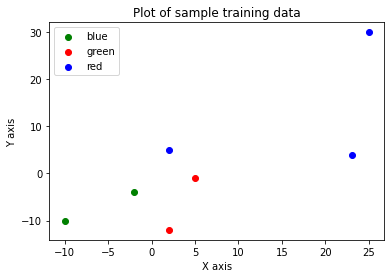

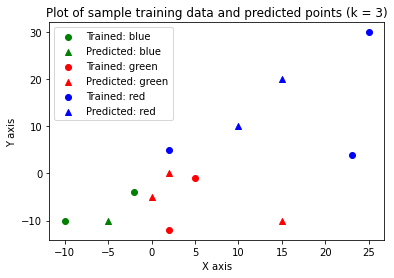

In [2]:
knn1 = KNN(3)
train1 = [([23, 4], 'red'), ([5, -1], 'green'), ([-2, -4], 'blue'), ([2, 5], 'red'), ([25, 30], 'red'), 
          ([2, -12], 'green'), ([-10, -10], 'blue')]
knn1.train(train1)
knn1.plot_train()
knn1.predict([10, 10], True)
knn1.predict([2,0], True)
knn1.predict([15,20], True)
knn1.predict([0,-5], True)
knn1.predict([-5, -10], True)
knn1.predict([15, -10], True)
knn1.plot_train_and_predictions()

## Write a python routines to split a given data set (randomly) into testing and training subsets. It’s a good idea to parameterize this process with a percentage p so the data is split into sets of size np and n(1 − p); then you can “tune” p later for your specific training/testing procedure.

In [3]:
# split_sets Function
def split_sets_iris(dataframe, train_p):
    """
    Returns 2 lists of the form needed to use the KNN class using the iris data set
    """
    assert(train_p < 1) # Make sure that p is a percentage
    
    # Split dataframe into training and test/prediction sets
    train_count = int(dataframe.shape[0] * train_p)
    predict_count = int(dataframe.shape[0] * (1 - train_p))
    
    tmp_list = dataframe.values
    train_list = [(0,0) for _ in range(train_count)]
    for i in range(0, train_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #train_list.append(([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4]))
        train_list[i] = ([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4])

    
    predict_list = [(0,0) for _ in range(predict_count)]
    for i in range(0, predict_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #predict_list.append(([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4]))
        predict_list[i] = ([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4])
    '''
    print(train_list)
    print(predict_list)
    print(len(train_list), len(predict_list))
    '''
    
    return train_list, predict_list

## 4. Using Python, implement the k-means algorithm and test this on the Iris dataset. Try using all of the columns versus only a subset. What works the best? How well does the algorithm do when setting k = 3, the true number of classes? Show the results visually (using only 2-d scatter plots) – be sure to indicate visually both the predicted cluster result and the true iris class.

In [4]:
iris = pd.read_csv('iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

iris
##using python is not in there

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
setosa = iris[iris['class'] == "Iris-setosa"]
versicolor = iris[iris['class'] == "Iris-versicolor"].reset_index()
virginica = iris[iris['class'] == "Iris-virginica"].reset_index()

In [141]:
class KMeans:
    """Given some data, determines k means to be used for classification"""
    def __init__(self, means):
        self.means = []
    
    def train(self, data, k, c):
        """Run the k-means algorithm, stores the final means in self.means"""
        # 1. choose k points at random from data
        copy_data = np.copy(data)
        np.random.shuffle(copy_data)
        self.means = copy_data[:k] # grab the first k rows after a random shuff
    
        # 2. loop the following until self.means stops changing
        #    - for each self.means as m, gather all rows of copy_data
        #         for which m is the closest mean, call this group_m
        count = 0
        while count < c: # want to add a convergence check
            #groups = np.array([np.zeros((0,4)), np.zeros((0,4)), np.zeros((0,4))]) # set of rows in copy_data for which self.means[i] is the closest mean
                       # aggregated group as a matrix, rows are rows of data
            groups = [[],[],[]]
            for i in range(len(self.means)):
                #print(group.shape)
                for row in copy_data:
                    #distances = []
                    #print(row[:4] - self.means[0][:4])
                    minimum = np.inf #la.norm(row[:4] - self.means[0][:4])
                    min_mean = 0
                    for j in range(len(self.means)):
                        # calculate distance to self.means[i]
                        dist = la.norm(row[:4] - self.means[j][:4])
                        #print(dist)
                        if not np.isnan(dist) and dist < minimum:
                            minimum = dist
                            min_mean = j
                    # if min distance is at index i, then np.vstack([ group, row ])
                    #print(f'{i} {min_mean}')
                    if i == min_mean:
                        #print(f'stacking {row} onto {groups[i]}')
                        #print(f'stacked: {np.vstack([groups[i], row[:4]])}')
                        groups[i] += [row[:4].astype('float64')]
                        #groups[i] = np.vstack([groups[i],row[:4].astype('float64')])
                        #print(np.array(groups[i]))
                        #print(f'groups[{i}] = {groups[i]}')
                count += 1
                groups[i] = np.array(groups[i])
            #    - re-assign self.means[m] = mean(group_m)
            # self.means[i] = np.mean(group, axis=0)
            #print(self.means[i])
            self.means = [np.mean(group, axis=0) for group in groups]
        print(f'self.means: {self.means}')
        plt.scatter(iris['sepal_length'], iris['sepal_width'])
        plt.scatter(self.means[0][0], self.means[0][1], c = 'red')
        plt.scatter(self.means[1][0], self.means[1][1], c = 'green')
        plt.scatter(self.means[2][0], self.means[2][1], c = 'orange')
        plt.xlim(4,8)
        plt.ylim(1.9,4.5)
        return groups[0], groups[1], groups[2]
    
    def test(self, x, t1, t2, t3):
        """Return the mean closest to x among self.means"""
        # find row of self.means that is the closest to x in euclidean distance
        distances = []
        dist1 = np.inf
        dist2 = np.inf
        dist3 = np.inf
        print(t1[x][:2])
        print(t2[x][:2])
        print(t3[x][:2])
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t1[x][:2] )
            if mean < dist1:
                dist1 = mean
        distances.append(dist1)
        
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t2[x][:2] )
            if mean < dist2:
                dist2 = mean
        distances.append(dist2)
        
        for i in range(len(self.means)):
            mean = la.norm( self.means[i][:2] - t3[x][:2] )
            if mean < dist3:
                dist3 = mean
        distances.append(dist3)
        print(distances)
        
        # return it
        minimum = min(distances)
        for i in range(len(distances)):
            if minimum == distances[i]:
                return i

self.means: [array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.006, 3.418, 1.464, 0.244])]


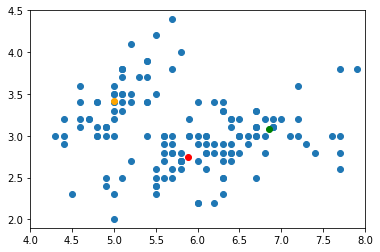

In [142]:
kmeans = KMeans(3)
s, ve, vi = kmeans.train(iris,3, 1000)

In [143]:
print("Size of True setosa list ",len(setosa))
print("Size of KMeans setosa list ",len(s))

print("Size of True versicolor list ",len(versicolor))
print("Size of KMeans versicolor list ",len(ve))

print("Size of True virginica list ",len(virginica))
print("Size of KMeans virginica list ",len(vi))

Size of True setosa list  50
Size of KMeans setosa list  61
Size of True versicolor list  50
Size of KMeans versicolor list  39
Size of True virginica list  50
Size of KMeans virginica list  50


In [144]:
sw = []
vew = []
viw = []
for i in range(len(s)):
    sw.append(s[i][:2])
sw = np.array(sw)
#copy array for later use in test
cpsw = np.array(sw)

for i in range(len(ve)):
    vew.append(ve[i][:2])
vew = np.array(vew)
cpvew = np.array(vew)

for i in range(len(vi)):
    viw.append(vi[i][:2])
viw = np.array(viw)
cpviw = np.array(viw)


## Comparison Between Original and KMeans Predicted points

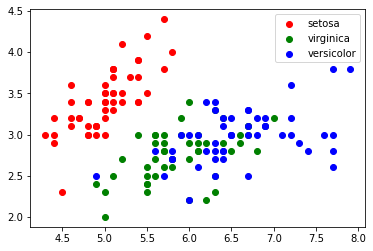

In [145]:
#original
plt.scatter(setosa['sepal_length'], setosa['sepal_width'], c = 'red')
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], c = 'green')
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], c = 'blue')
plt.legend(['setosa', 'virginica', 'versicolor'])

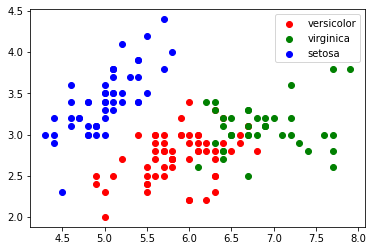

In [146]:
#Kmeans predicted
sw = pd.DataFrame(sw)
vew = pd.DataFrame(vew)
viw = pd.DataFrame(viw)
plt.scatter(sw[0],sw[1], c = 'red')
plt.scatter(vew[0],vew[1], c = 'green')
plt.scatter(viw[0],viw[1], c = 'blue')
plt.legend(['versicolor', 'virginica', 'setosa'])

In [147]:
#Checks which mean is closest to the given index value
x = 10
closest_mean = kmeans.test(x, cpsw, cpvew, cpviw)
if(closest_mean == 0):
    print("Mean with closest distance to  chosen index value: Setosa mean")
if(closest_mean == 1):
    print("Mean with closest distance to chosen index value: Versicolor mean")
if(closest_mean == 2):
    print("Mean with closest distance to chosen index value: Virginica mean")

[6.5 2.8]
[7.2 3.2]
[4.5 2.3]
[0.4493255958926212, 0.36738319803875713, 1.2271756190537688]
Mean with closest distance to chosen index value: Versicolor mean


When k = 3 and the full dataset is used, the algorithm appears to be decently accurate in terms of distance to the given mean of a point. Though the data is not equal to the "True" data, given by the Iris dataset, the Kmeans algorithm clusters similar data better than the original data based off distance alone.

## 5. Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.
### (a) Show some confusion matrices for different size testing versus training datasets.
### (b) How does the accuracy change for different size training sets? Show how the accuracy changes within the training set and testing set separately.
### (c) What if you repeat this process, keeping the training fraction p the same? Does the accuracy change drastically based on the “quality” of the testing set? How might you quantify this behavior?

In [70]:
#A) Show some confusion matrices for different size testing versus training datasets.
print('Testing for change in p:')
# Test 1 p = .1, k = 5
tlist, plist = split_sets_iris(iris, .1)
# Set the confusion matrix
confusion_matrix = {"Correct": 0, "Incorrect": 0}
# Create the class k = 5
knn2 = KNN(5)
# Train the data
knn2.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn2.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 1: For KNN, k = 5, p = .1, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 2 p = .35, k = 5
tlist, plist = split_sets_iris(iris, .35)
# Set the confusion matrix
confusion_matrix = {"Correct": 0, "Incorrect": 0}
# Create the class k = 5
knn3 = KNN(5)
# Train the data
knn3.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn3.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 2: For KNN, k = 5, p = .35, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 3 p = .5, k = 5
tlist, plist = split_sets_iris(iris, .5)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 5
knn4 = KNN(5)
# Train the data
knn4.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn4.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 3: For KNN, k = 5, p = .5, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 4 p = .75, k = 5
tlist, plist = split_sets_iris(iris, .75)
# Set the confusion matrix
confusion_matrix = {"Correct": 0, "Incorrect": 0}
# Create the class k = 5
knn5 = KNN(5)
# Train the data
knn5.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn5.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 4: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 5 p = .95, k = 5
tlist, plist = split_sets_iris(iris, .95)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 5
knn6 = KNN(5)
# Train the data
knn6.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn6.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 5: For KNN, k = 5, p = .95, the confusion matrix for the iris data set is {confusion_matrix}')
# TESTING FOR CHANGE IN K
print('Testing for change in k:')
# Test 6 p = .75, k = 3
tlist, plist = split_sets_iris(iris, .75)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 3
knn7 = KNN(3)
# Train the data
knn7.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn7.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 6: For KNN, k = 3, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 7 p = .75, k = 5
tlist, plist = split_sets_iris(iris, .75)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 5
knn8 = KNN(5)
# Train the data
knn8.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn8.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 7: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 8 p = .75, k = 11
tlist, plist = split_sets_iris(iris, .75)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 11
knn9 = KNN(11)
# Train the data
knn9.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn9.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 8: For KNN, k = 11, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')

Testing for change in p:
Test 1: For KNN, k = 5, p = .1, the confusion matrix for the iris data set is {'Correct': 109, 'Incorrect': 26}
Test 2: For KNN, k = 5, p = .35, the confusion matrix for the iris data set is {'Correct': 95, 'Incorrect': 2}
Test 3: For KNN, k = 5, p = .5, the confusion matrix for the iris data set is {'Correct': 73, 'Incorrect': 2}
Test 4: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {'Correct': 35, 'Incorrect': 2}
Test 5: For KNN, k = 5, p = .95, the confusion matrix for the iris data set is {'Correct': 7, 'Incorrect': 0}
Testing for change in k:
Test 6: For KNN, k = 3, p = .75, the confusion matrix for the iris data set is {'Correct': 37, 'Incorrect': 0}
Test 7: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {'Correct': 37, 'Incorrect': 0}
Test 8: For KNN, k = 11, p = .75, the confusion matrix for the iris data set is {'Correct': 33, 'Incorrect': 4}


#B)
Each time this algorithm is run, results may vary because the machine might visualize a certain sample differently regardless of any changes to the code. Generally, the more points we add to the training set, the more correct our results will be because there are more points for the algorithm to base it's decision off of. For example: with 100 samples, we may only have 2 points around the desired point versus with 10,000 samples, we may have 5. If k=5, the result of this dataset would be different depending on what the machine is looking for. When we vary the size of the testing set, the error chance will also still vary. With either too many or too few values to predict, overtraining and undertraining can lead to a large error margin with either not enough for the algorithm to go off of, or having so many data points, the amount of points actually being predicted are so few. Since the prediction points are a random selection, certain points may be more apparent to decide than others, so with more identical points, the algorithm will have to work harder to compute these more "critical points" that could go either way.

#C)
Upon repeating this process or algorithm continuously, the results will vary each time because the data of the training sets(or the choices the computer makes of certain values) will change on every run. Sometimes training points can be very close together, while other times, training points may be far apart and easier to decipher. On average, the closer the data is to one another, the less the data will vary each time. We could determine the quality of the data output based on how consistent and how accurate the data is by running it several times to find how much the output varies each time. Upon reaching a certain threshold of varience, we could determine data too innaccurate to reliably use. Each time the algorithm falls within the threshold, we would add 1 to the accurate counter, if outside, add 1 to the innaccuracy counter. After finding the fraction, use percentages to determine the probability of the algorithm to be reliable.

## 6. Try using the adult dataset to also do some prediction of income level (more or less than $50k).




In [ ]:
adults = pd.read_csv('adult.data',header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','income']
)

adults

### (a) How can you try to quantify the “distance” between two adults? Write some small python functions to try and transform this data into something that can be used by the kNN classifier. Try a couple different approaches, report their different behaviors and illustrate using learning curves, confusion matrices, and possibly some statistical measurements.

Using numerical data in the adults dataset is the easiest way to quantify the "distance" between two adults. If comparing the income of the two adults, we can use hours-per-week, age, and education num to determine how much money the adults are making at  any point. We can split the data in terms of how long someone has worked as a type of distance, we can split the data in terms of how many years someone has of education since a higher education generally pays better, and lastly, we look at how many hours a week someone works split between "more" and "less" at a certain threshold. These three values can be used in our KNN classifier to determine the "distance" in the end.

In [ ]:
#Classify income based on age, education-num, and hours worked per week
def split_sets_adult(dataframe, train_p):
    """
    Returns 2 lists of the necessary form
    """
    assert(train_p < 1) # Make sure that p is a percentage
    
    # Split dataframe into training and test/prediction sets
    train_count = int(dataframe.shape[0] * train_p)
    predict_count = int(dataframe.shape[0] * (1 - train_p))
    
    #tmp_list = dataframe.values
    
    tmp_list = dataframe.values[:]
    np.random.shuffle(tmp_list)
    train_list = tmp_list[0:train_count]
    predict_list = tmp_list[train_count+1:]
    
    #train_list = [ dataframe.values[random.randint(0,train_count-1)][0:4] for i in range(0, train_count) ]
    #predict_list = [ dataframe.values[random.randint(0,train_count-1)][0:4] for i in range(0, predict_count) ]
    
    train_list = [(0,0) for _ in range(train_count)]
    for i in range(0, train_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #train_list.append(([rand_row[0], rand_row[1], rand_row[2]], rand_row[3]))
        train_list[i] = ([rand_row[0], rand_row[1], rand_row[2]], rand_row[3])


    predict_list = [(0,0) for _ in range(predict_count)]
    for i in range(0, predict_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #predict_list.append(([rand_row[0], rand_row[1], rand_row[2]], rand_row[3]))
        predict_list[i] = ([rand_row[0], rand_row[1], rand_row[2]], rand_row[3])

    #print(train_list)
    #print(predict_list)
    #print(len(train_list), len(predict_list))
    
    
    return train_list, predict_list

In [ ]:
sub_data_1 = adults[['age', 'education-num', 'hours-per-week', 'income']]
%prun split_sets_adult(sub_data_1, 0.1)

## Test 1

In [ ]:
sub_data_1 = adults[['age', 'education-num', 'hours-per-week', 'income']]

# Set the training percentage values and the corresponding incorrect percentages
train_percentage = [.01, .05, .1, .2, .3, .4, .5, .6]
incorrect_percentage = [0, 0, 0, 0, 0, 0, 0, 0]
# Run the algorithm for each value of p

for index,tp in enumerate(train_percentage):
    tlist, plist = split_sets_adult(sub_data_1, tp)

    adult_knn = KNN(5)
    adult_knn.train(tlist)
    conf_mat = {"Correct": 0, "Incorrect": 0}
    for ind,i in enumerate(plist):
        check = adult_knn.predict(i[0])
        if check == i[1]:
            conf_mat["Correct"] += 1
        else:
            conf_mat["Incorrect"] += 1
    print(f'Test {index + 1}: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {conf_mat}')
    incorrect_percentage[index] = conf_mat["Incorrect"] / (conf_mat["Correct"] + conf_mat["Incorrect"])

plt.plot(train_percentage, incorrect_percentage, color='green')
plt.title('Predicting Income Learning Curve: Error % as Training Increases (k = 5)')
plt.xlabel('Training Percentage p')
plt.ylabel('Percentage Incorrect')
plt.show()

Sample results from above:

Test 1: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 24062, 'Incorrect': 8173}

Test 2: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 23510, 'Incorrect': 7422}

Test 3: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 22575, 'Incorrect': 6729}

Test 4: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 19981, 'Incorrect': 6067}

Test 5: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 17704, 'Incorrect': 5088}

Test 6: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 15108, 'Incorrect': 4428}

Test 7: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 12789, 'Incorrect': 3491}

Test 8: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 10293, 'Incorrect': 2731}

## Test 2

In [ ]:
# fix_sex Function => Creates unique values for each sex in the dataframe and returns the new dataframe
def fix_sex(dataframe):
    #dataframe['sex'] = dataframe['sex'].replace(['Male', 'Female'], [0, 1])
    dataframe.loc[(dataframe.sex == 'Male'), 'sex'] = 0
    dataframe.loc[(dataframe.sex == 'Female'), 'sex'] = 1
    return dataframe

In [ ]:
# Test 2
sub_data_2 = adults[['age', 'sex', 'capital-gain', 'income']]
sub_data_2 = fix_sex(sub_data_2)

# Set the training percentage values and the corresponding incorrect percentages
train_percentage = [.01, .05, .1, .2, .3, .4, .5, .6]
incorrect_percentage = [0, 0, 0, 0, 0, 0, 0, 0]
# Run the algorithm for each value of p
for index,tp in enumerate(train_percentage):
    
    tlist, plist = split_sets_adult(sub_data_2, tp)

    adult_knn = KNN(5)
    adult_knn.train(tlist)
    conf_mat = {"Correct": 0, "Incorrect": 0}
    for ind,i in enumerate(plist):
        if ind > 2000:
            break
        check = adult_knn.predict(i[0])
        if check == i[1]:
            conf_mat["Correct"] += 1
        else:
            conf_mat["Incorrect"] += 1
    print(f'Test {index + 1}: Adult data based off of age, sex, and capital_gain: The confusion matrix is {conf_mat}')
    incorrect_percentage[index] = conf_mat["Incorrect"] / (conf_mat["Correct"] + conf_mat["Incorrect"])

plt.plot(train_percentage, incorrect_percentage, color='green')
plt.title('Predicting Income Learning Curve: Error % as Training Increases (k = 5)')
plt.xlabel('Training Percentage p')
plt.ylabel('Percentage Incorrect')
plt.show()

Sample data from above:

Test 1: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1520, 'Incorrect': 481}

Test 2: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1539, 'Incorrect': 462}

Test 3: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1581, 'Incorrect': 420}

Test 4: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1564, 'Incorrect': 437}

Test 5: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1504, 'Incorrect': 497}

Test 6: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1618, 'Incorrect': 383}

Test 7: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1565, 'Incorrect': 436}

Test 8: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1548, 'Incorrect': 453}


### (b) Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?

By setting an income of <=50K to 0 and >50K to 1, we can determine the distance between each person in a sample and guess what sex we think they are in the sample chosen because of the common fact of wage gaps between genders and trends of which genders tend to work specific jobs. For example, we can look at the lowest pay for a job in a group and the education num, a hypothesis to be made could be that it is more likely the sample will be a woman if they have a lower education and hours worked compared to men with the same statistics. 

A second test to be made could be occupation based on the gender of each sample chosen by assigning each gender a number (0,1). Each person's occupation is typically influenced by their gender, their income, and their work class. Though this is not 100% accurate, using more general observations will likely prove consistent. For example: certain high paying jobs are more likely to be in a specific work class and a specific gender could be more likely to be in a higher work class, thus transitively, we can hypothesize a certain gender in a certain work class are likely to make more money.